In [1]:
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi

apitoken = '0ac08bc0e23b22dcff4888822d56241be15b0a64e77e94c42639a524404aafbc7df008ab6043e4706b3b82aa42f03c06464b3c253b92ddf1337e80048cf53be0'
IBMQ.save_account(apitoken)

configrc.store_credentials:WARNING:2021-10-10 20:49:47,690: Credentials already present. Set overwrite=True to overwrite.


In [2]:
n = 5
q = QuantumRegister(n)
c = ClassicalRegister(n)
circuit = QuantumCircuit(q,c)

In [3]:
circuit.h(q)
circuit.measure(q, c)
circuit.draw()


┌───┐┌─┐            
q0_0: ┤ H ├┤M├────────────
      ├───┤└╥┘┌─┐         
q0_1: ┤ H ├─╫─┤M├─────────
      ├───┤ ║ └╥┘┌─┐      
q0_2: ┤ H ├─╫──╫─┤M├──────
      ├───┤ ║  ║ └╥┘┌─┐   
q0_3: ┤ H ├─╫──╫──╫─┤M├───
      ├───┤ ║  ║  ║ └╥┘┌─┐
q0_4: ┤ H ├─╫──╫──╫──╫─┤M├
      └───┘ ║  ║  ║  ║ └╥┘
c0: 5/══════╩══╩══╩══╩══╩═
            0  1  2  3  4

Job Status: job has successfully run


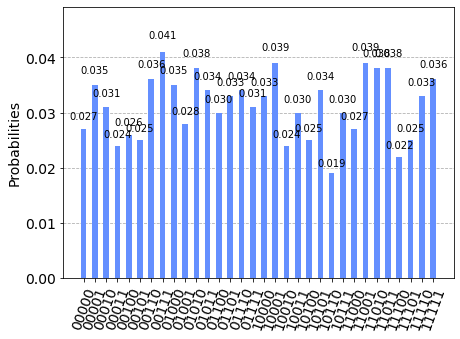

In [4]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub = 'ibm-q', group = 'open', project = 'main')
qcomp = provider.get_backend('ibmq_santiago')
job = execute(circuit, backend = qcomp, shots = 1000)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

plot_histogram(counts)